In [2]:
!pip install factor-analyzer

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41441 sha256=c7d2e6dbdbf18c0626e9a5b89ea544f63a7bd1d85835a9815460854210e713d4
  Stored in directory: c:\users\dmaqp\appdata\local\pip\cache\wheels\00\cf\ea\83feab47e1d682730be5935c52a2647f49adfb393e948d4bf5
Successfully built factor-analyzer


In [3]:
from factor_analyzer import FactorAnalyzer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('font', family ='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

<AxesSubplot:>

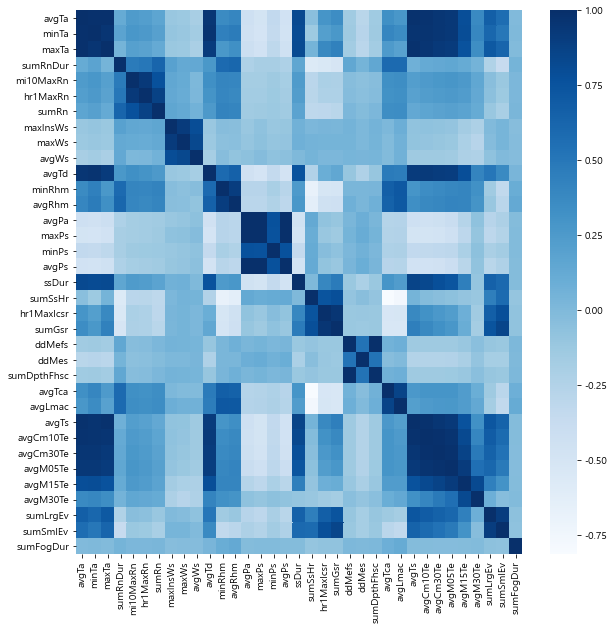

In [4]:
# 추출한 날씨데이터 가져오기
wth_df = pd.read_csv('wth_data_20211025.csv',index_col=0)
# Nan값 데이터 0으로 채우기
wth_df.fillna(0, inplace=True)
wth_df['tm'] = pd.to_datetime(wth_df['tm'])

# 날씨데이터의 index 날짜로 설명
wth_df = wth_df.set_index(wth_df['tm'])
wth_df.drop('tm', axis=1, inplace=True)

# 각 칼럼별 연관성 파악
wth_df.corr(method='pearson')
plt.figure(figsize =(10,10))
sns.heatmap(wth_df.corr(method='pearson'),cmap='Blues', fmt ='.2f')

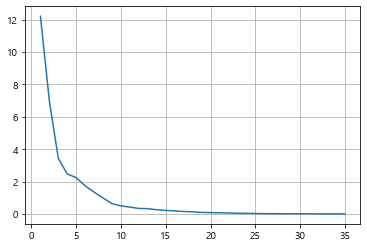

In [5]:
# 날씨 데이터 스케일러
from sklearn.preprocessing import StandardScaler
x = wth_df.loc[:, :]
x_tr=StandardScaler().fit_transform(x)
wth_df2= pd.DataFrame(x_tr, index=wth_df.index, columns=wth_df.columns)

# 날씨데이터 요인분석 4개의 항목으로 진행
from factor_analyzer import FactorAnalyzer 
fa = FactorAnalyzer(4, rotation="varimax", method='minres', use_smc=True)
fa.fit(wth_df2)

ev, v = fa.get_eigenvalues()
plt.plot(range(1,wth_df2.shape[1]+1),ev)
plt.grid()

In [6]:
FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

pri =pd.DataFrame(np.round(fa.loadings_,2), 
                  index=wth_df.columns, columns =['Factor1','Factor2', 'Factor3','Factor4'])

factor_scores =pd.DataFrame(fa.transform(wth_df2), index=wth_df2.index, columns=
                            ['Factor1', 'Factor2', 'Factor3', 'Factor4'])

label = {'avgTa':'평균기온', 'minTa':'최저기온', 'maxTa':'최고기온', 'sumRnDur':'강수계속시간', 'mi10MaxRn':'10분최다강수', 'hr1MaxRn':'1시간최다강수', 'sumRn':'일강수',
       'maxInsWs':'최대순간풍속', 'maxWs':'최대풍속', 'avgWs':'평균풍속', 'avgTd':'평균이슬점온도', 'minRhm':'최소상대습도', 'avgRhm':'평균상대습도', 'avgPa':'평균현지기압',
       'maxPs':'최고해면기압', 'minPs':'최저해면기압', 'avgPs':'평균해면기압', 'ssDur':'가조시간', 'sumSsHr':'합계일조시간', 'hr1MaxIcsr':'1시간최다일사량', 'sumGsr':'합계일사량',
       'ddMefs':'최심신적설', 'ddMes':'최심적설', 'sumDpthFhsc':'3시간신적설', 'avgTca':'평균전운량', 'avgLmac':'평균중하층운량', 'avgTs':'평균지면온도',
       'avgCm10Te':'평균10cm지중온도', 'avgCm30Te':'평균30cm지중온도', 'avgM05Te':'0.5m지중온도', 'avgM15Te':'1.5m지중온도', 'avgM30Te':'3m지중온도',
       'sumLrgEv':'대형증발량', 'sumSmlEv':'소형증발량', 'sumFogDur':'안개계속시간'}

pri.rename(index=label)
scores = factor_scores.rename(columns={'Factor1':'온도', 'Factor2':'흐림','Factor3':'기압','Factor4':'바람'})

In [ ]:
today = pd.datetime.now()
today_str = str(today)[:10].replace('-','')

# theme_nm='두나무 관련주'
# path = '{}_list_{}.csv'.format(theme_nm, today_str)

for path_theme in theme_path : 
    path = path_theme

    df_theme_code_result = pd.read_csv(path,index_col=0)
    df_theme_code_result = df_theme_code_result.set_index(df_theme_code_result['Date'])
    df_theme_code_result.drop('Date',axis=1,inplace=True)
    df_theme_code_result.cd = df_theme_code_result.cd.apply(lambda x : str(x).zfill(6))

    df_list=[]

    for i in range(len(df_theme_code_result.cd.unique())) : 
        code = df_theme_code_result.cd.unique()[i]
        df = df_theme_code_result[df_theme_code_result['cd']==code]
        df_list.append(df)

    for j in range(len(df_list)) : 
        df_list[j].index = df_list[j].index.astype('datetime64[ns]')
        wth_df.index = wth_df.index.astype('datetime64[ns]')

        join_df = wth_df.join(df_list[j], how='inner')
    #     print(df_list[j].cd.unique())
    #     plt.figure(figsize =(4,4))
    #     plt.title(df_list[j].cd.unique())
    #     sns.heatmap(join_df.corr(method='pearson'),annot=True, cmap='Blues', fmt ='.2f')
        if (abs(join_df.corr(method='pearson')) > 0.07).count().sum() > 1445:
            print('='*10)
            print(df_list[j].cd.unique())
            print(join_df.corr(method='pearson'))
        

In [110]:
df_list

[            Close   Volume    Change      cd
 Date                                        
 2000-01-04   7471   830800  0.149385  011930
 2000-01-05   7068   593940 -0.053942  011930
 2000-01-06   6710   563820 -0.050651  011930
 2000-01-07   6683   529110 -0.004024  011930
 2000-01-10   6738   531610  0.008230  011930
 ...           ...      ...       ...     ...
 2021-10-14   2250  1233031  0.020408  011930
 2021-10-15   2305  2004812  0.024444  011930
 2021-10-18   2290  1052066 -0.006508  011930
 2021-10-19   2290  1355218  0.000000  011930
 2021-10-20   2270   844828 -0.008734  011930
 
 [5381 rows x 4 columns],
             Close    Volume    Change      cd
 Date                                         
 2016-12-15   1274  10855724       NaN  246690
 2016-12-16   1654  38712274  0.298273  246690
 2016-12-19   1688  14020503  0.020556  246690
 2016-12-20   1601  16574050 -0.051540  246690
 2016-12-21   1588   7228228 -0.008120  246690
 ...           ...       ...       ...     ..

In [148]:
 path = './테마별 주식데이터/제습기_list_20211027.csv'

df_theme_code_result = pd.read_csv(path,index_col=0)
df_theme_code_result = df_theme_code_result.set_index(df_theme_code_result['Date'])
df_theme_code_result.drop('Date',axis=1,inplace=True)
df_theme_code_result.cd = df_theme_code_result.cd.apply(lambda x : str(x).zfill(6))

df_list=[]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

for i in range(len(df_theme_code_result.cd.unique())) : 
    code = df_theme_code_result.cd.unique()[i]
    df = df_theme_code_result[df_theme_code_result['cd']==code]
    df_list.append(df)

k = 0
for j in range(len(df_list)) : 
    df_list[j].index = df_list[j].index.astype('datetime64[ns]')
    wth_df.index = wth_df.index.astype('datetime64[ns]')

    join_df = wth_df.join(df_list[j], how='inner')

    join_df.dropna(inplace=True)
    
    x = join_df.iloc[:,:-4]
    y = join_df['Close']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    ss = StandardScaler()
    ss.fit(x_train)
    tr_scaled =ss.transform(x_train)
    ts_scaled =ss.transform(x_test)
    
    rfr = RandomForestRegressor()

    rfr.fit(tr_scaled, y_train)
    
    print('----------------')
    print(join_df.cd[0])
    print('rfr_score:', rfr.score(tr_scaled, y_train))
    print('rfr_score_ts:', rfr.score(ts_scaled, y_test))
#     k+=1
#     if k >10 :
#         break

----------------
037070
rfr_score: 0.9183037399263219
rfr_score_ts: 0.39009409039842213
----------------
066570
rfr_score: 0.8946791749368872
rfr_score_ts: 0.17777469976823623
----------------
002700
rfr_score: 0.9221018443930451
rfr_score_ts: 0.4652167806742922
----------------
005930
rfr_score: 0.9345856499698343
rfr_score_ts: 0.5200224139918092
----------------
044340
rfr_score: 0.9224028838232197
rfr_score_ts: 0.4603796309653939
----------------
284740
rfr_score: 0.9355713893895017
rfr_score_ts: 0.5099747477258074
----------------
021240
rfr_score: 0.9269640777357172
rfr_score_ts: 0.5204884465077546
----------------
071460
rfr_score: 0.9306891475391467
rfr_score_ts: 0.48786788062973174
----------------
058610
rfr_score: 0.91703833919785
rfr_score_ts: 0.3936230296593509


In [108]:
x = join_df.iloc[:,:-4]
y = join_df['Change']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
tr_scaled =ss.transform(x_train)
ts_scaled =ss.transform(x_test)

# from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
# lr=LinearRegression()
# kreg = KNeighborsRegressor()
rfr =RandomForestRegressor()

# lr.fit(tr_scaled, y_train)
# kreg.fit(tr_scaled, y_train)
rfr.fit(tr_scaled, y_train)

# print('lr_score:', lr.score(tr_scaled, y_train))
# print('lr_score_ts:', lr.score(ts_scaled, y_test))
# print('----------------')
# print('kr_score:', kreg.score(tr_scaled, y_train))
# print('kr_score_ts:', kreg.score(ts_scaled, y_test))
print('----------------')
print('rfr_score:', rfr.score(tr_scaled, y_train))
print('rfr_score_ts:', rfr.score(ts_scaled, y_test))

----------------
rfr_score: 0.8558796174685066
rfr_score_ts: -0.07628834693917264
